In [24]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sb
import numpy as np

from notebooks.int_utils import retrieve_thresholds, retrieve_scratch

In [20]:
thresh = retrieve_thresholds()
thresh = thresh[thresh["task"] != "BINARY"]
thresh["setting"] = "thresh - " + thresh["task"]

scratch = retrieve_scratch().drop(columns="source")
scratch = scratch.groupby("model").median()
scratch["setting"] = "scratch"

all = pd.concat([scratch, thresh])
all

,run_num,balanced_accuracy,f1_0,f1_1,f1_2,setting,model,task,threshold_1,threshold_2
CONV5_FC3,3.0,0.606315,0.600000,0.368421,0.821053,scratch,NaN,NaN,NaN,NaN
RES,3.0,0.670882,0.740741,0.071429,0.851064,scratch,NaN,NaN,NaN,NaN
SERES,3.0,0.742117,0.800000,0.521739,0.886364,scratch,NaN,NaN,NaN,NaN
SFCN,3.0,0.778079,0.782609,0.550000,0.883721,scratch,NaN,NaN,NaN,NaN
VIT,3.0,0.751323,0.755556,0.576923,0.909091,scratch,NaN,NaN,NaN,NaN
0,3,0.466211,0.292683,0.325581,0.744681,thresh - SSIM,VIT,SSIM,-0.000120,0.000577
1,3,0.559513,0.523077,0.325581,0.714286,thresh - MOTION,VIT,MOTION,0.065194,0.083433
3,3,0.683529,0.651163,0.541667,0.850575,thresh - SSIM,SFCN,SSIM,0.033159,0.053187
4,3,0.669807,0.640000,0.390244,0.896552,thresh - MOTION,SFCN,MOTION,0.852847,0.962064
6,3,0.573407,0.530612,0.340426,0.804878,thresh - SSIM,SERES,SSIM,0.020769,0.030356


<Axes: xlabel='setting', ylabel='balanced_accuracy'>

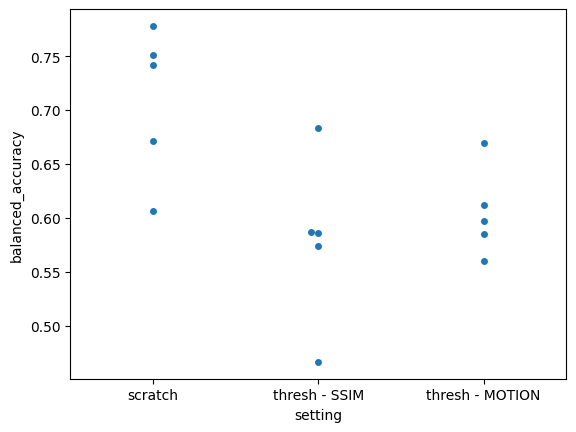

In [21]:
sb.swarmplot(all, x="setting", y="balanced_accuracy", dodge=True)

In [30]:
thresh = retrieve_thresholds(unbalanced=True)
thresh = thresh[thresh["task"] != "BINARY"]
thresh["setting"] = "thresh - " + thresh["task"]

scratch = retrieve_scratch(unbalanced=True).drop(columns="source")
# scratch = scratch.groupby("model", as_index=False).median()
scratch["setting"] = "scratch"

all = pd.concat([scratch, thresh])
all

,model,run_num,balanced_accuracy,f1_0,f1_1,f1_2,setting,task,threshold_1,threshold_2
0,CONV5_FC3,2,0.333333,0.459770,0.000000,0.000000,scratch,NaN,NaN,NaN
0,RES,3,0.333333,0.459770,0.000000,0.000000,scratch,NaN,NaN,NaN
0,SERES,5,0.333333,0.459770,0.000000,0.000000,scratch,NaN,NaN,NaN
0,RES,2,0.333333,0.459770,0.000000,0.000000,scratch,NaN,NaN,NaN
0,VIT,2,0.448276,0.519481,0.000000,0.512821,scratch,NaN,NaN,NaN
0,VIT,4,0.572797,0.645161,0.222222,0.711111,scratch,NaN,NaN,NaN
0,SFCN,5,0.402874,0.461538,0.000000,0.571429,scratch,NaN,NaN,NaN
0,SFCN,4,0.418391,0.500000,0.000000,0.558824,scratch,NaN,NaN,NaN
0,VIT,1,0.584291,0.701754,0.206897,0.708333,scratch,NaN,NaN,NaN
0,SFCN,3,0.333333,0.459770,0.000000,0.000000,scratch,NaN,NaN,NaN


<Axes: xlabel='setting', ylabel='balanced_accuracy'>

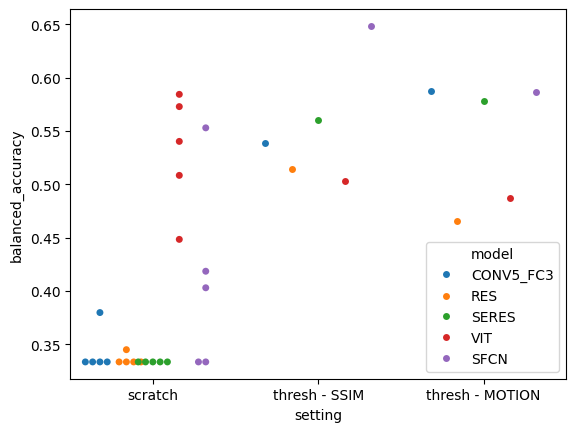

In [31]:
sb.swarmplot(all, x="setting", y="balanced_accuracy", hue="model", dodge=True)